## Final Project Submission

Please fill out:
* Student name: Nicholas Green
* Student pace: self pace
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Overview
This project analyzes the oppurtunity for Zillow, an online real estate marketplace company, to encourage homeowners in making smart renovations to increase their home's equity. Exploratory data analysis shows trends in home value are related to certain home features and can be touched on to make one's residence more noteworthy. Models can be made using this data to implement a tool Zillow can use to make impactful suggestions.

# Business Understanding
### Stakeholders
Zillow, as previously stated, is an online real estate marketplace company. Online and founded by former Microsoft executives, is a company familiar with implementing user friendly data-driven tools.

### What We Are Answering
We are seeking to provide competitive insight as to which renovations provide value within a home by building a statistical regression model. It will answer how certain renovations tied to certain aspects of a home generate a calulable surplus in home value.

# Data Understanding

### Data Summary
The data comes from the metropolitan King County, Washington, a northwestern part of the country. King County holds a population of 2,269,675 according to the 2020 census, making it more populous than the average county. King County is strongly liberal, has a large minority demographic of at least 35.2 perecent, and its 2016 median household income is above its contemporary US average counterpart 57,617, at 78,800. 

Assuming these characteristics still hold true, it could suggest that prices for renovations may yield more here than other parts of the country since King County seems pricier than the average county. That detail can be overlooked when generalizing our model however, so no cause for concern. The fact that the area is quite diverse helps the model as well, since it helps the model project for all kinds of people using it. Lastly, the population of the area serves to improve the model because the amount of people is sufficient to draw accurate conclusions from.

### Data Representation

#### Understanding The Variables
Now that the data's origin is validated, breaking down each column's significance is important for understanding how each variable is meant to be interpreted. The following is pasted from an accompanying file in this repository

#### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

#### Inspecting The Data
After understanding each part of the data, it is time to explore it, clean it, and find trends within it.

In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [162]:
#Loading Data
house_data = pd.read_csv('data/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [163]:
#Observing Data Types
house_data.info()

#Counting Missing Values
house_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [164]:
#Oberving Null Denotations
house_data[['waterfront', 'view', 'yr_renovated']].head()

,waterfront,view,yr_renovated
0,NaN,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,NaN
3,NO,NONE,0.0
4,NO,NONE,0.0


In [165]:
#Replacing Nulls
for col in house_data.columns:
    try:
        median = house_data[col].median()
        house_data[col] = house_data[col].fillna(value=median)
    except:
        continue
house_data.waterfront = house_data.waterfront.fillna('NO')
house_data.view = house_data.view.fillna('NONE')
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [166]:
#Inspecting Filled Values
house_data[['waterfront', 'view', 'yr_renovated']].head()

,waterfront,view,yr_renovated
0,NO,NONE,0.0
1,NO,NONE,1991.0
2,NO,NONE,0.0
3,NO,NONE,0.0
4,NO,NONE,0.0


#### Data Range
I am curious about the dates of the data. Looking up the spread of the years the home were built will describe the ages of the houses we are looking at. I am also curious about the years homes were renovated

In [167]:
house_data[['yr_built', 'yr_renovated']].describe()

,yr_built,yr_renovated
count,21597.000000,21597.000000
mean,1970.999676,68.758207
std,29.375234,364.037499
min,1900.000000,0.000000
25%,1951.000000,0.000000
50%,1975.000000,0.000000
75%,1997.000000,0.000000
max,2015.000000,2015.000000


It looks like the earliest home was built in 1900, meaning the houses range from 1900 to 2015 for a total spread of 115 years. Furthermore, the mean is lower than the median indicating that there is a slight left skew of the data from the earliest builds, but the majority of houses were made within the last 50 years.

The years renovated seems fishy. Houses could not be renovated if they were not built, yet more than 75% of the data says they were renovated in year 0. Perhaps 0 is meant to show that there were not any renovations made, meaning the majority of houses built are the same they have ever been. Further investigation will be needed to better understand the spread of houses that have been renovated. 

In [168]:
#Investigating renovated houses
renovated = house_data['yr_renovated'].sort_values(ascending=False).head((house_data['yr_renovated'] > 0).sum())
house_data['yr_built'].describe(), renovated.describe()

(count    21597.000000
 mean      1970.999676
 std         29.375234
 min       1900.000000
 25%       1951.000000
 50%       1975.000000
 75%       1997.000000
 max       2015.000000
 Name: yr_built, dtype: float64,
 count     744.000000
 mean     1995.928763
 std        15.599946
 min      1934.000000
 25%      1987.000000
 50%      2000.000000
 75%      2007.250000
 max      2015.000000
 Name: yr_renovated, dtype: float64)

There are only 744 of the entire 21,597 houses that have been renovated. The renovations range from 1934 to 2015 for a total spread of 81 years. The majority of renovations have been made within the last 30 years which makes sense because some houses built up to that point needed updating. The mean is lower than the median which suggests that the earliest renovations skew the data left.

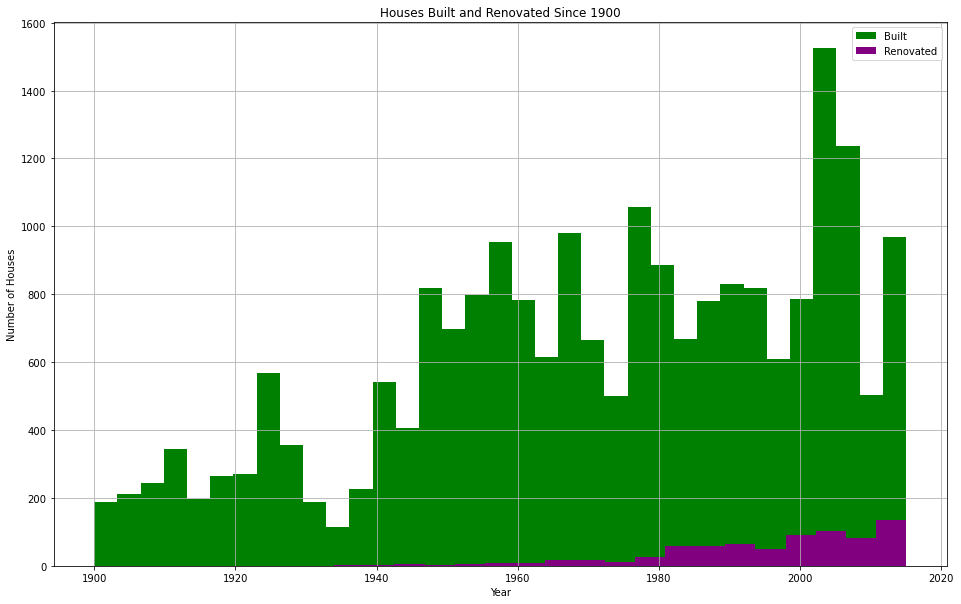

In [169]:
#Plotting their distributions
house_data['yr_built'].hist(color='green', label='Built', bins='auto', figsize=(16, 10))
renovated.hist(color='purple', label='Renovated', bins='auto')

plt.legend()
plt.title('Houses Built and Renovated Since 1900')
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.show()

Wow, with that visual it is easy to see how vastly unrenovated houses outnumber their renovated counterparts in this data.
Are renovated houses worth more however? The question to answer is how much renovations may increase home value after all.

In [170]:
#Finding the mean price of renovated and unrenovated houses
renovated_price = house_data[house_data['yr_renovated'] != 0]['price']
print('Renovated median: $', renovated_price.median())
unrenovated_price = house_data[house_data['yr_renovated'] == 0]['price']
print('Unrenovated median: $', unrenovated_price.median())

"""
Finding how much more the median renovated house is worth than unrenovated
"""
print('The typical renovated house is worth $', renovated_price.median()-unrenovated_price.median(), 
'more by comparison of medians')

Renovated median: $ 607502.0
Unrenovated median: $ 449000.0
The typical renovated house is worth $ 158502.0 more by comparison of medians


In [131]:
def replace1(col):
    new = []
    for i in house_data[col]:
        new.append(int(i[0:2]))
    return new

house_data['grade'] = replace1('grade')
house_data['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

It seems renovated homes are worth considerably more. The major difference in sample size may affect that number, but the difference begs investigation into home values.

Making histograms of each variable shows the distribution and therefore noteworthy variables. Near normal histograms for variables are good signs.

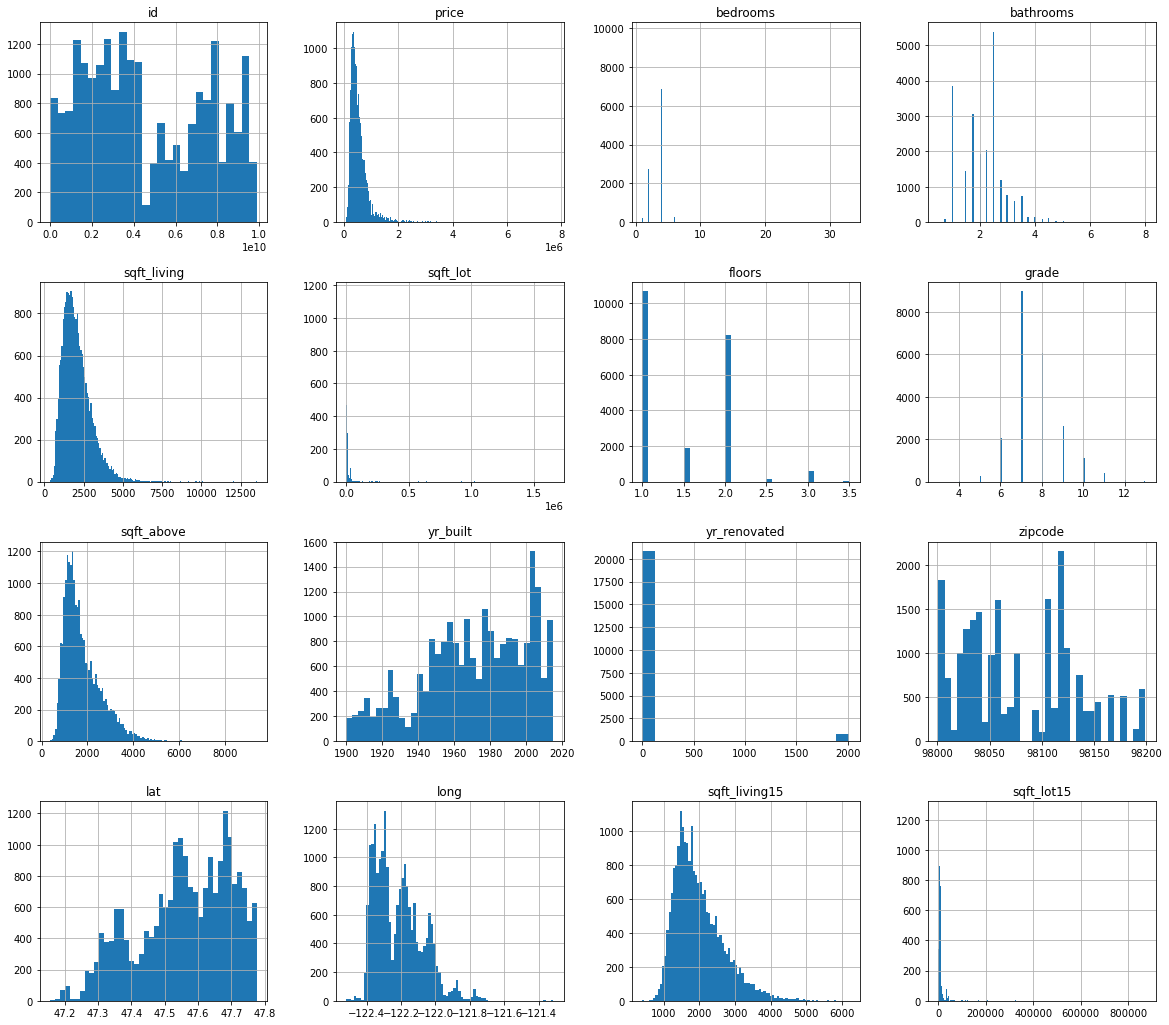

In [132]:
house_data.hist(bins='auto', figsize=(20,18))

plt.show()

# Modeling

After identifying some variables to be more influential than others, it is time to test them against our model. The goal of the model is to obtain a satisfactory R-squared coefficent since that explains how well the model accounts for the data's variance. It is also important to examine how linear the variables are with the outcome, since linear regression models are contingent on such a relationship. Collinearity should also be checked for since there may be variables influencing others.

Since price is the variable that is trying to be estimated, it will be considered the outcome. This will be an interative process to find the model that best fits the data.

In [171]:
#Variable to be estimated
outcome = 'price'
#Variables to be tested:
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'sqft_lot15']
#Normalizing variables
for col in x_cols:
    house_data[col] = ((house_data[col] - house_data[col].mean())/ house_data[col].std())

In [172]:
from statsmodels.formula.api import ols

#Constructing model formula
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     5344.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:26:44   Log-Likelihood:            -2.9869e+05
No. Observations:               21597   AIC:                         5.974e+05
Df Residuals:                   21591   BIC:                         5.974e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1671.396    323.261      0.000    5.37e+05    5.44e+05
bedrooms    -6.664e+04   2089.877    -31.888      0.000   -7.07e+04   -6.25e+04
bathrooms    6.147e+04   2881.486     21.334      0.000    5.58e+04    6.71e+04
sqft_living  2.818e+05   2774.599    101.556      0.000    2.76e+05    2.87e+05
yr_built    -8.932e+04   1966.347    -45.422      0.000   -9.32e+04   -8.55e+04
sqft_lot15  -1.857e+04   1713.654    -10.837      0.000   -2.19e+04   -1.52e+04
==============================================================================
Omnibus:                    13966.150   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           477926.428
Skew:                           2.604   Prob(JB):                         0.00
Kurtosis:                      25.450   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* An R-squared value of 0.617 is not bad for the first crack.
* There do not appear to be any P values over the alpha value 0.05 either
<p>
Let's check linearity as well
    <p/>

In [135]:
#Importing necassary modules
import statsmodels.api as sm
import scipy.stats as stats

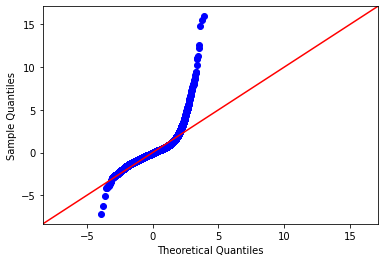

In [173]:
#Compares linearity over quantiles
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

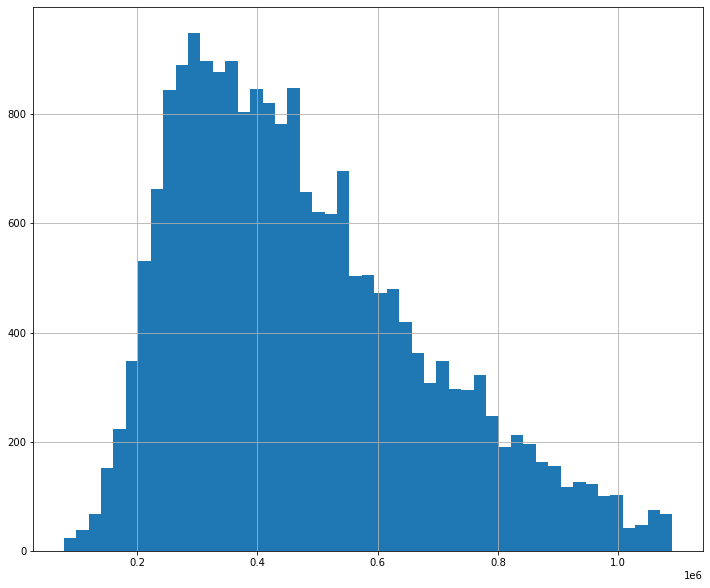

In [174]:
# Subsetting to better fit
subset = house_data[(house_data.price < 1100000)]
subset.price.hist(bins='auto', figsize=(12,10))

In [116]:
from sklearn.model_selection import train_test_split

In [175]:
# Applying a log transformation
subset.price = house_data.price.map(np.log) 
train, test = train_test_split(subset)

# Refitting model with subset
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

C:\Users\nadel\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     2153.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:27:05   Log-Likelihood:                -5192.6
No. Observations:               15276   AIC:                         1.040e+04
Df Residuals:                   15270   BIC:                         1.044e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0207      0.003   4677.779      0.000      13.015      13.026
bedrooms       -0.0566      0.003    -16.245      0.000      -0.063      -0.050
bathrooms       0.1015      0.005     20.864      0.000       0.092       0.111
sqft_living     0.3246      0.005     62.449      0.000       0.314       0.335
yr_built       -0.1022      0.003    -30.696      0.000      -0.109      -0.096
sqft_lot15     -0.0109      0.003     -3.743      0.000      -0.017      -0.005
==============================================================================
Omnibus:                      140.352   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.027
Skew:                          -0.236   Prob(JB):                     5.31e-32
Kurtosis:                       3.058   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built', 'condition', 'floors', 'waterfront']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     958.8
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:27:29   Log-Likelihood:                -3266.1
No. Observations:               15276   AIC:                             6572.
Df Residuals:                   15256   BIC:                             6725.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.2685      0.017    763.553      0.000      13.234      13.303
grade[T.11 Excellent]      0.0261      0.032      0.806      0.420      -0.037       0.089
grade[T.12 Luxury]        -0.3115      0.174     -1.791      0.073      -0.653       0.029
grade[T.3 Poor]           -0.9498      0.301     -3.160      0.002      -1.539      -0.361
grade[T.4 Low]            -1.0826      0.063    -17.237      0.000      -1.206      -0.960
grade[T.5 Fair]           -1.0269      0.029    -35.554      0.000      -1.083      -0.970
grade[T.6 Low Average]    -0.7953      0.019    -42.988      0.000      -0.832      -0.759
grade[T.7 Average]        -0.5116      0.016    -32.631      0.000      -0.542      -0.481
grade[T.8 Good]           -0.2795      0.015    -19.172      0.000      -0.308      -0.251
grade[T.9 Better]         -0.0877      0.015     -5.953      0.000      -0.117      -0.059
condition[T.Fair]         -0.1861      0.026     -7.052      0.000      -0.238      -0.134
condition[T.Good]          0.0158      0.006      2.629      0.009       0.004       0.028
condition[T.Poor]         -0.1657      0.064     -2.570      0.010      -0.292      -0.039
condition[T.Very Good]     0.0865      0.010      8.855      0.000       0.067       0.106
waterfront[T.YES]          0.3369      0.051      6.624      0.000       0.237       0.437
bedrooms                  -0.0295      0.003     -9.348      0.000      -0.036      -0.023
bathrooms                  0.0503      0.004     11.191      0.000       0.042       0.059
sqft_living                0.1727      0.005     31.770      0.000       0.162       0.183
yr_built                  -0.1670      0.003    -50.162      0.000      -0.174      -0.160
floors                     0.0883      0.006     15.339      0.000       0.077       0.100
==============================================================================
Omnibus:                      125.699   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.755
Skew:                          -0.198   Prob(JB):                     9.03e-30
Kurtosis:                       3.232   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

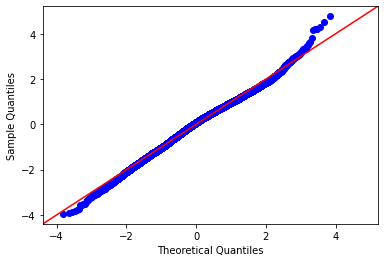

In [179]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

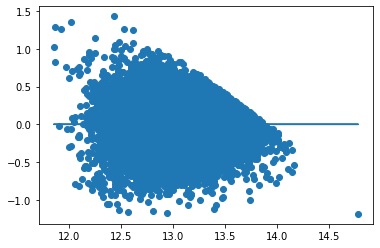

In [180]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Looks like the model is considered fairly linear between extremely low and extremely high values, but fails elsewhere. A subset of the data should help the model retain linearity.

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'floors']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.554179656245716),
 ('bathrooms', 2.970003699966174),
 ('sqft_living', 2.64504007243411),
 ('grade', 1.3927212139264549),
 ('yr_built', 1.0395593758787307)]

In [182]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_lot15', 'yr_built', 'grade']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2433.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:28:24   Log-Likelihood:            -2.9716e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21582   BIC:                         5.945e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.031e+06   7246.549    142.320      0.000    1.02e+06    1.05e+06
grade[T.11 Excellent]   3.706e+05   1.34e+04     27.659      0.000    3.44e+05    3.97e+05
grade[T.12 Luxury]      1.008e+06   2.54e+04     39.716      0.000    9.58e+05    1.06e+06
grade[T.13 Mansion]     2.305e+06   6.42e+04     35.929      0.000    2.18e+06    2.43e+06
grade[T.3 Poor]        -7.942e+05   2.29e+05     -3.467      0.001   -1.24e+06   -3.45e+05
grade[T.4 Low]         -7.989e+05    4.5e+04    -17.742      0.000   -8.87e+05   -7.11e+05
grade[T.5 Fair]        -7.949e+05   1.71e+04    -46.367      0.000   -8.29e+05   -7.61e+05
grade[T.6 Low Average]  -7.31e+05   9895.474    -73.874      0.000    -7.5e+05   -7.12e+05
grade[T.7 Average]     -6.216e+05   7944.281    -78.243      0.000   -6.37e+05   -6.06e+05
grade[T.8 Good]        -4.805e+05   7640.465    -62.895      0.000   -4.96e+05   -4.66e+05
grade[T.9 Better]      -2.582e+05   8199.574    -31.488      0.000   -2.74e+05   -2.42e+05
bedrooms                2657.6453   1852.617      1.435      0.151    -973.621    6288.911
bathrooms               1.019e+05   2439.852     41.778      0.000    9.72e+04    1.07e+05
sqft_lot15             -3525.7531   1576.008     -2.237      0.025   -6614.844    -436.662
yr_built               -1.225e+05   1897.605    -64.564      0.000   -1.26e+05   -1.19e+05
==============================================================================
Omnibus:                    15907.597   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           961355.776
Skew:                           2.972   Prob(JB):                         0.00
Kurtosis:                      35.140   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built', 'condition', 'floors', 'waterfront']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     958.8
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:30:05   Log-Likelihood:                -3266.1
No. Observations:               15276   AIC:                             6572.
Df Residuals:                   15256   BIC:                             6725.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.2685      0.017    763.553      0.000      13.234      13.303
grade[T.11 Excellent]      0.0261      0.032      0.806      0.420      -0.037       0.089
grade[T.12 Luxury]        -0.3115      0.174     -1.791      0.073      -0.653       0.029
grade[T.3 Poor]           -0.9498      0.301     -3.160      0.002      -1.539      -0.361
grade[T.4 Low]            -1.0826      0.063    -17.237      0.000      -1.206      -0.960
grade[T.5 Fair]           -1.0269      0.029    -35.554      0.000      -1.083      -0.970
grade[T.6 Low Average]    -0.7953      0.019    -42.988      0.000      -0.832      -0.759
grade[T.7 Average]        -0.5116      0.016    -32.631      0.000      -0.542      -0.481
grade[T.8 Good]           -0.2795      0.015    -19.172      0.000      -0.308      -0.251
grade[T.9 Better]         -0.0877      0.015     -5.953      0.000      -0.117      -0.059
condition[T.Fair]         -0.1861      0.026     -7.052      0.000      -0.238      -0.134
condition[T.Good]          0.0158      0.006      2.629      0.009       0.004       0.028
condition[T.Poor]         -0.1657      0.064     -2.570      0.010      -0.292      -0.039
condition[T.Very Good]     0.0865      0.010      8.855      0.000       0.067       0.106
waterfront[T.YES]          0.3369      0.051      6.624      0.000       0.237       0.437
bedrooms                  -0.0295      0.003     -9.348      0.000      -0.036      -0.023
bathrooms                  0.0503      0.004     11.191      0.000       0.042       0.059
sqft_living                0.1727      0.005     31.770      0.000       0.162       0.183
yr_built                  -0.1670      0.003    -50.162      0.000      -0.174      -0.160
floors                     0.0883      0.006     15.339      0.000       0.077       0.100
==============================================================================
Omnibus:                      125.699   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.755
Skew:                          -0.198   Prob(JB):                     9.03e-30
Kurtosis:                       3.232   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

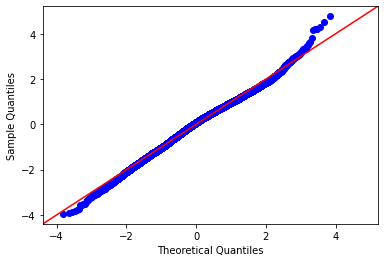

In [187]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

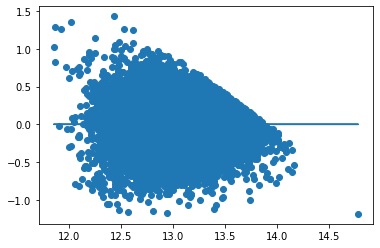

In [188]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])
plt.show()